In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv(r"C:\Users\Swet Navadiya\Desktop\Heart failure prediction\Data.csv")



In [2]:
# Check number of rows and column
data.shape

(299, 13)

In [3]:
# Check the total missing values in each column.
print("Total NULL Values in each columns\n")
print(data.isnull().sum())

Total NULL Values in each columns

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [4]:
#Describe Datatypes of features of dataset and number of NULL value if any.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#Describe First 5 Rows and all Features.
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
# Count value of Death event.
data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
#Give all statastic values of each features. 
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
# Calculate average value of "age" in dataset.
data['age'].mean()

60.83389297658862

In [11]:
# Describe most common "age" in dataset.
data['age'].mode()
  

0    60.0
dtype: float64

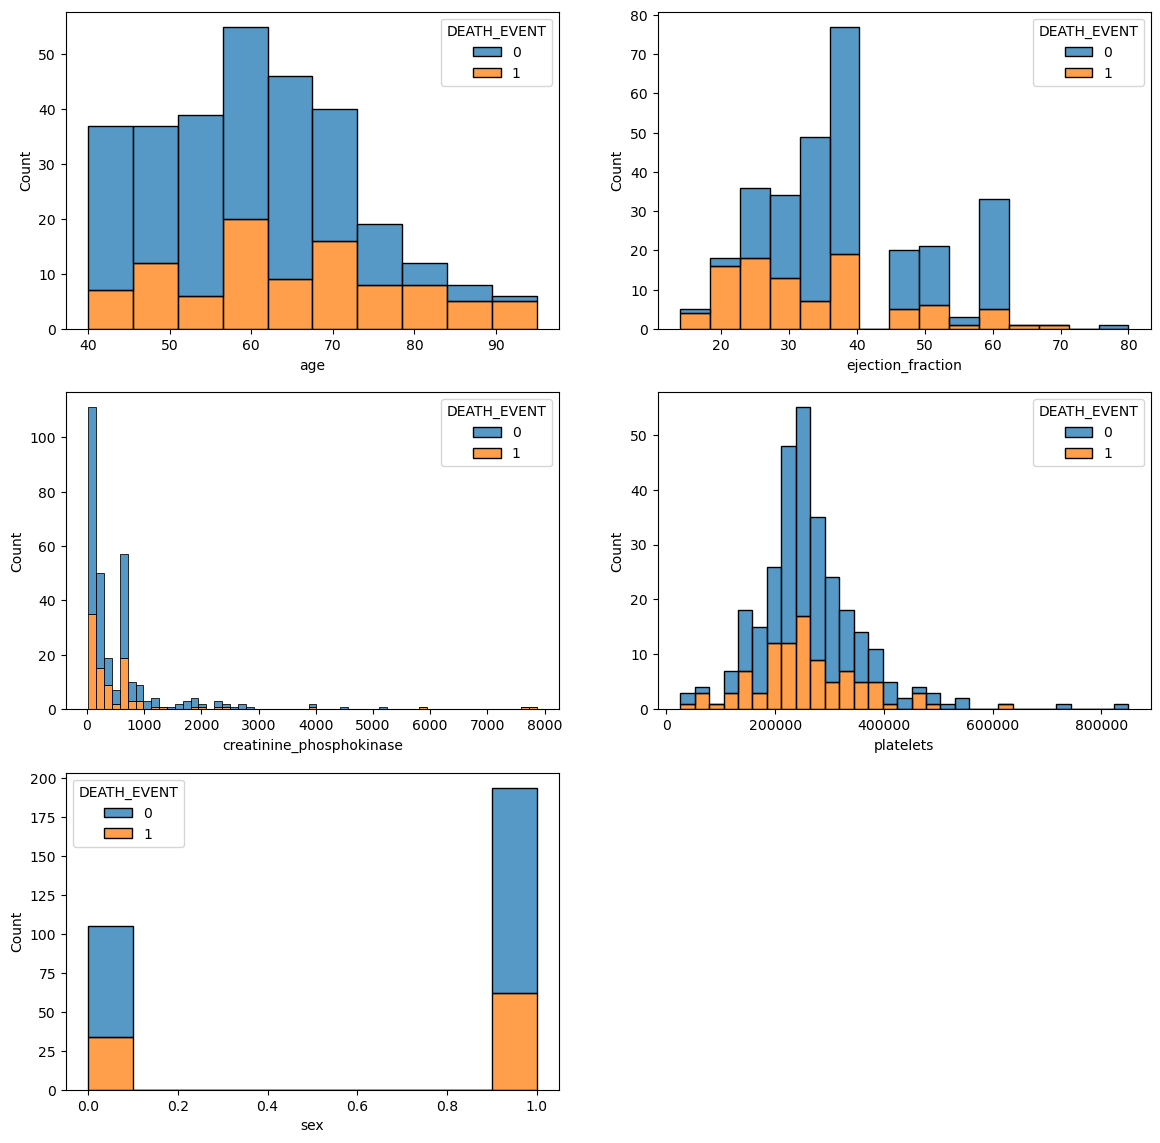

In [7]:
#Age distribution of dataset
fig,ax=plt.subplots(3,2,figsize=(14,14))
sns.histplot(ax=ax[0,0],x='age',hue='DEATH_EVENT',data=data,multiple='stack')
sns.histplot(ax=ax[0,1],x='ejection_fraction',hue='DEATH_EVENT',data=data,multiple='stack')
sns.histplot(ax=ax[1,0],x='creatinine_phosphokinase',hue='DEATH_EVENT',data=data,multiple='stack')
sns.histplot(ax=ax[1,1],x='platelets',hue='DEATH_EVENT',data=data,multiple='stack')
sns.histplot(ax=ax[2,0],x='sex',hue='DEATH_EVENT',data=data,multiple='stack')
fig.delaxes(ax[2][1])



In [14]:
male = data[data["sex"] == 1]
female = data[data["sex"] == 0]

male_survived = male[data["DEATH_EVENT"] == 0]
male_not_survived = male[data["DEATH_EVENT"] == 1]
female_survived = female[data["DEATH_EVENT"] == 0]
female_not_survived = female[data["DEATH_EVENT"] == 1]

print(len(male_survived))
print(len(male_not_survived))
print(len(female_survived))
print(len(female_not_survived))

132
62
71
34


C:\Users\Swet Navadiya\AppData\Local\Temp/ipykernel_11948/235360551.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survived = male[data["DEATH_EVENT"] == 0]
C:\Users\Swet Navadiya\AppData\Local\Temp/ipykernel_11948/235360551.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_not_survived = male[data["DEATH_EVENT"] == 1]
C:\Users\Swet Navadiya\AppData\Local\Temp/ipykernel_11948/235360551.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survived = female[data["DEATH_EVENT"] == 0]
C:\Users\Swet Navadiya\AppData\Local\Temp/ipykernel_11948/235360551.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_not_survived = female[data["DEATH_EVENT"] == 1]


C:\Users\Swet Navadiya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

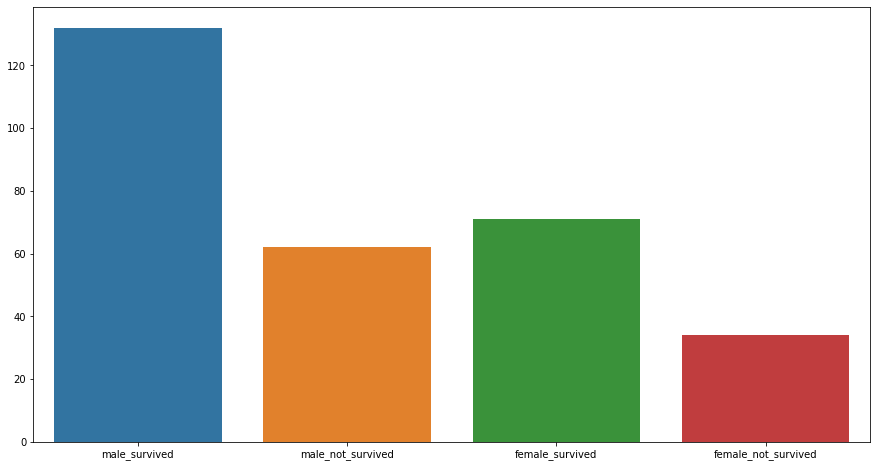

In [15]:
labels=['male_survived','male_not_survived','female_survived','female_not_survived']
# values = [len(male_survived),len(male_not_survived), len(female_survived),len(female_not_survived)]
values = [132,62,71,34]
# plt.figimage
plt.figure(figsize=(15,8))
sns.barplot(labels,values,)
# plt.show()

In [16]:
print(len(male_survived))
print(len(male_not_survived))
print(len(female_survived))
print(len(female_not_survived))


132
62
71
34


<AxesSubplot:xlabel='serum_creatinine'>

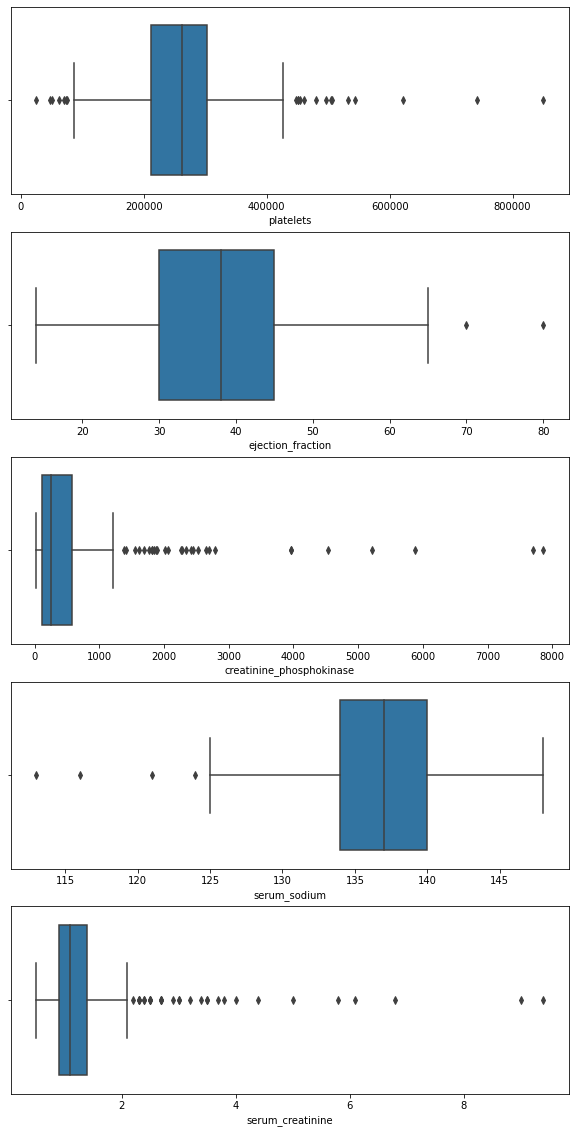

<Figure size 1080x1008 with 0 Axes>

In [17]:
fig,ax=plt.subplots(5,1,figsize=(10,20))
plt.figure(figsize=(15,14))
sns.boxplot(ax=ax[0],x='platelets',data=data)
sns.boxplot(ax=ax[1],x='ejection_fraction',data=data)
sns.boxplot(ax=ax[2],x='creatinine_phosphokinase',data=data)
sns.boxplot(ax=ax[3],x='serum_sodium',data=data)
sns.boxplot(ax=ax[4],x='serum_creatinine',data=data)

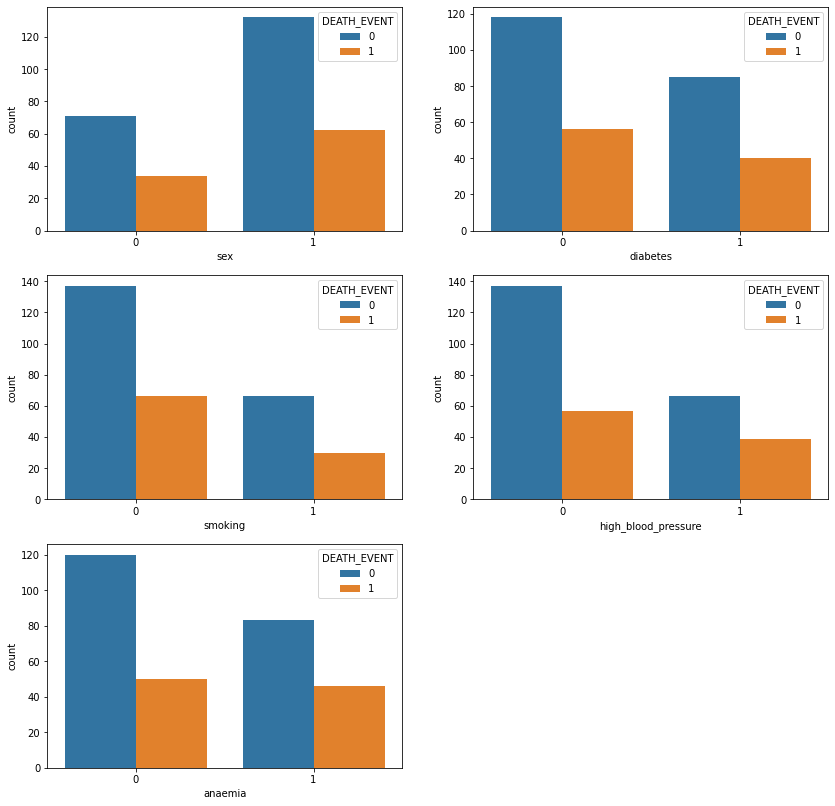

In [18]:
# Death event vs Discrete variable graph 
fig, ax = plt.subplots(3,2,figsize=(14,14))
sns.countplot(ax=ax[0,0],x=data['sex'],hue='DEATH_EVENT',data=data)
sns.countplot(ax=ax[0,1],x=data['diabetes'],hue='DEATH_EVENT',data=data)
sns.countplot(ax=ax[1,0],x=data['smoking'],hue='DEATH_EVENT',data=data)
sns.countplot(ax=ax[1,1],x=data['high_blood_pressure'],hue='DEATH_EVENT',data=data)
sns.countplot(ax=ax[2,0],x=data['anaemia'],hue='DEATH_EVENT',data=data)
fig.delaxes(ax[2][1])


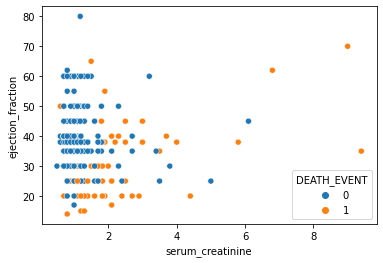

In [19]:
sns.scatterplot(x=data["serum_creatinine"], y=data["ejection_fraction"], hue=data["DEATH_EVENT"])
plt.show()



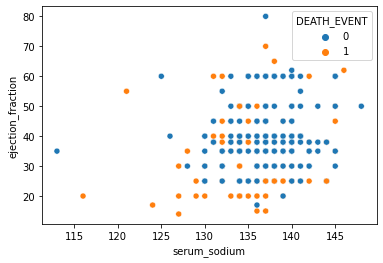

In [20]:
sns.scatterplot(x=data1["serum_sodium"], y=data1["ejection_fraction"], hue=data1["DEATH_EVENT"])
plt.show()

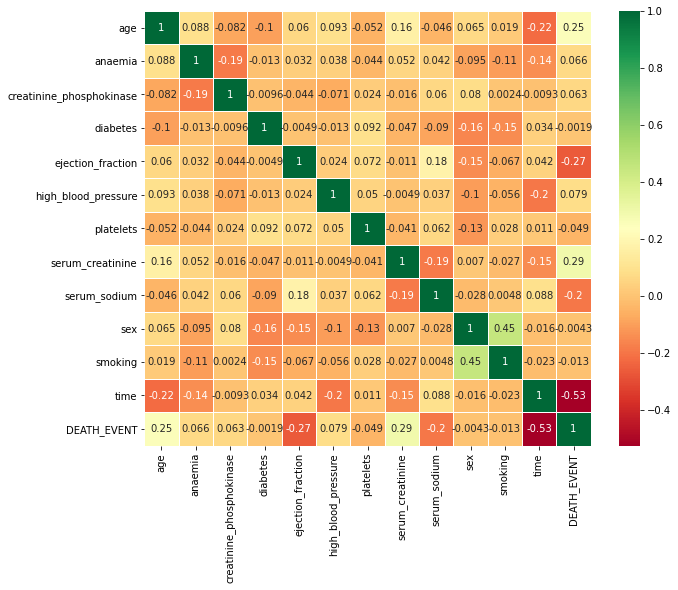

In [21]:
plt.figure(figsize=[10,8])
corr = sns.heatmap(data.corr(),linewidths=.5, annot=True, cmap="RdYlGn")

In [22]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectFromModel, SelectKBest
from imblearn.over_sampling import SMOTE

 



# x is dependent variable and y is target variable.
x=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]
print(x.shape)
print(y.shape)
y.value_counts()

(299, 12)
(299,)


0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [23]:
#




,75.0,582.0,20.0,1.0,265000.0,1.9,130.0,4.0,55.0,7861.0,...,140.0.35,280.0.1,50.0.48,196.0.3,45.0.39,0.0.193,395000.0.1,1.6.5,136.0.39,285.0


In [24]:
#Here,Target data is imbalanced because DEATH_EVENT(1) is less than DEATH_EVENT(0). 
# So we can use Synthetic Minority Over-sampling Technique(SMOTE) for resampling.
from imblearn.over_sampling import SMOTE
x_smote,y_smote = SMOTE().fit_resample(x,y)
y_smote.value_counts()
print(x_smote.shape)
print(y_smote.shape)



(406, 12)
(406,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote,stratify = y_smote,test_size=0.30, random_state=69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
""" Algorithams which are the best for Binary classification listed below:
Logistic Regession
Decision Tree
Random Forest
Naive Bayes
Support Vector Machine(SVM)
k-nearest neighbours
Gradient Boosting
ADA boosting"""



(284, 12)
(122, 12)
(284,)
(122,)


' Algorithams which are the best for Binary classification listed below:\nLogistic Regession\nDecision Tree\nRandom Forest\nNaive Bayes\nSupport Vector Machine(SVM)\nk-nearest neighbours\nGradient Boosting\nADA boosting'

The accuracy of Logistic Regression is :  77.8688524590164 %
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        61
           1       0.76      0.82      0.79        61

    accuracy                           0.78       122
   macro avg       0.78      0.78      0.78       122
weighted avg       0.78      0.78      0.78       122



C:\Users\Swet Navadiya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

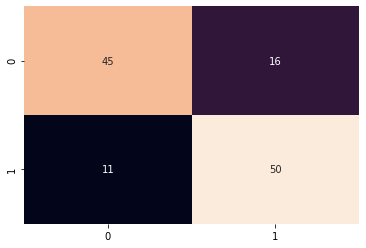

In [26]:
# Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model = LR.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,annot=True)





The accuracy of Decision Tree is :  87.70491803278688 %
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        61
           1       0.86      0.90      0.88        61

    accuracy                           0.88       122
   macro avg       0.88      0.88      0.88       122
weighted avg       0.88      0.88      0.88       122



<AxesSubplot:>

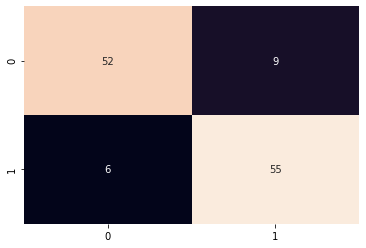

In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
model = DT.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("The accuracy of Decision Tree is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False, annot=True)

The accuracy of Random Forest is :  92.62295081967213 %
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        61
           1       0.91      0.95      0.93        61

    accuracy                           0.93       122
   macro avg       0.93      0.93      0.93       122
weighted avg       0.93      0.93      0.93       122



<AxesSubplot:>

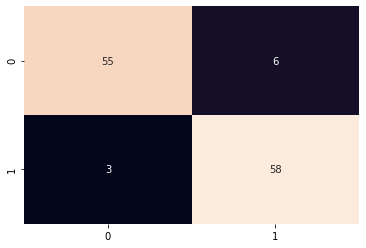

In [54]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(n_estimators=60)
model = RF.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))
      
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)


the accuracy of naive bayes algoritham is :  81.14754098360656 %
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        61
           1       0.87      0.74      0.80        61

    accuracy                           0.81       122
   macro avg       0.82      0.81      0.81       122
weighted avg       0.82      0.81      0.81       122



<AxesSubplot:>

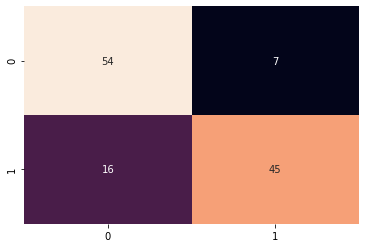

In [29]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB  
GNB= GaussianNB()  
GNB.fit(x_train, y_train) 
y_pred=GNB.predict(x_test)
print("the accuracy of naive bayes algoritham is : ",(accuracy_score(y_pred,y_test))*100,"%")
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)

the accuracy of SVM algoritham is :  77.04918032786885 %
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        61
           1       0.75      0.80      0.78        61

    accuracy                           0.77       122
   macro avg       0.77      0.77      0.77       122
weighted avg       0.77      0.77      0.77       122



<AxesSubplot:>

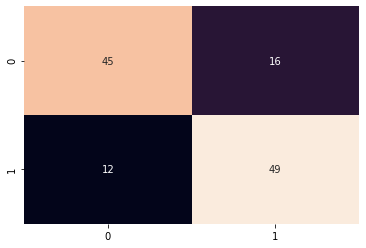

In [30]:
#Support Vector Machine
from sklearn.svm import SVC

SVM = SVC(kernel='linear')
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)
print("the accuracy of SVM algoritham is : ",(accuracy_score(y_test,y_pred))*100,"%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)


the accuracy of KNN algoritham is :  52.459016393442624 %
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        61
           1       0.52      0.62      0.57        61

    accuracy                           0.52       122
   macro avg       0.53      0.52      0.52       122
weighted avg       0.53      0.52      0.52       122



<AxesSubplot:>

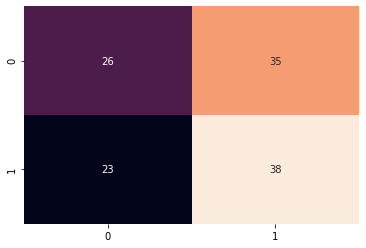

In [31]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN.fit(x_train, y_train) 
y_pred = KNN.predict(x_test)
print("the accuracy of KNN algoritham is : ",(accuracy_score(y_test,y_pred))*100,"%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)

the accuracy of Gradient Boosting algoritham is :  90.1639344262295 %
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        61
           1       0.88      0.93      0.90        61

    accuracy                           0.90       122
   macro avg       0.90      0.90      0.90       122
weighted avg       0.90      0.90      0.90       122



<AxesSubplot:>

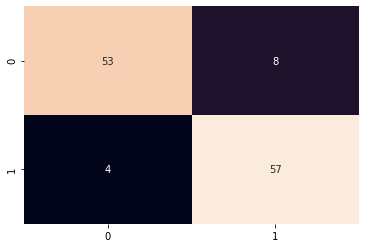

In [32]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GB= GradientBoostingClassifier()
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)
print("the accuracy of Gradient Boosting algoritham is : ",(accuracy_score(y_test,y_pred))*100,"%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)


the accuracy of ADA boosting algoritham is :  83.60655737704919 %
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.81      0.89      0.84        61

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



<AxesSubplot:>

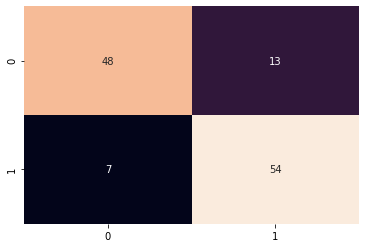

In [33]:
#ADA Boosting
from sklearn.ensemble import AdaBoostClassifier
ADA= AdaBoostClassifier(n_estimators=80,learning_rate=1)
ADA.fit(x_train, y_train)
y_pred = ADA.predict(x_test)
print("the accuracy of ADA boosting algoritham is : ",(accuracy_score(y_test,y_pred))*100,"%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), cbar=False, annot=True)


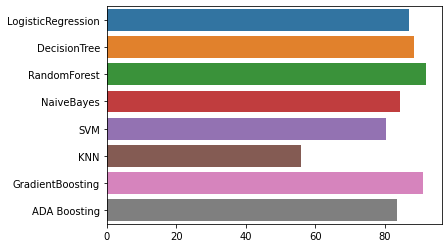

In [34]:
Accuracy_Score=[86.88,88.52,91.80,84.42,80.32,55.73,90.98,83.60]
Algorithams =['LogisticRegression','DecisionTree','RandomForest','NaiveBayes','SVM','KNN','GradientBoosting','ADA Boosting']
sns.barplot(x=Accuracy_Score,y=Algorithams)
plt.show()